In [5]:

import kagglehub
path = kagglehub.dataset_download('joebeachcapital/real-time-internet-of-things-rt-iot2022')

print('Data source import complete.')


Using Colab cache for faster access to the 'real-time-internet-of-things-rt-iot2022' dataset.
Data source import complete.


In [6]:
print(path)

/kaggle/input/real-time-internet-of-things-rt-iot2022


# 1.LOAD DATA

In [2]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter
simplefilter("ignore")

In [7]:
train=pd.read_csv('/kaggle/input/real-time-internet-of-things-rt-iot2022/RT_IOT2022.csv')

In [8]:
print(train.shape)

(123117, 85)


In [9]:
train.head()

,Unnamed: 0,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

In [11]:
target='Attack_type'
print(train['Attack_type'].unique())

['MQTT_Publish' 'Thing_Speak' 'Wipro_bulb' 'ARP_poisioning'
 'DDOS_Slowloris' 'DOS_SYN_Hping' 'Metasploit_Brute_Force_SSH'
 'NMAP_FIN_SCAN' 'NMAP_OS_DETECTION' 'NMAP_TCP_scan' 'NMAP_UDP_SCAN'
 'NMAP_XMAS_TREE_SCAN']


# 2. EXPLORATORY DATA

In [12]:
train.duplicated().sum()

np.int64(0)

In [13]:
categorical_columns = train.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(column)
    print(train[column].value_counts())
    print("----------------------------")

proto
proto
tcp     110427
udp      12633
icmp        57
Name: count, dtype: int64
----------------------------
service
service
-         102861
dns         9753
mqtt        4132
http        3464
ssl         2663
ntp          121
dhcp          50
irc           43
ssh           28
radius         2
Name: count, dtype: int64
----------------------------
Attack_type
Attack_type
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64
----------------------------


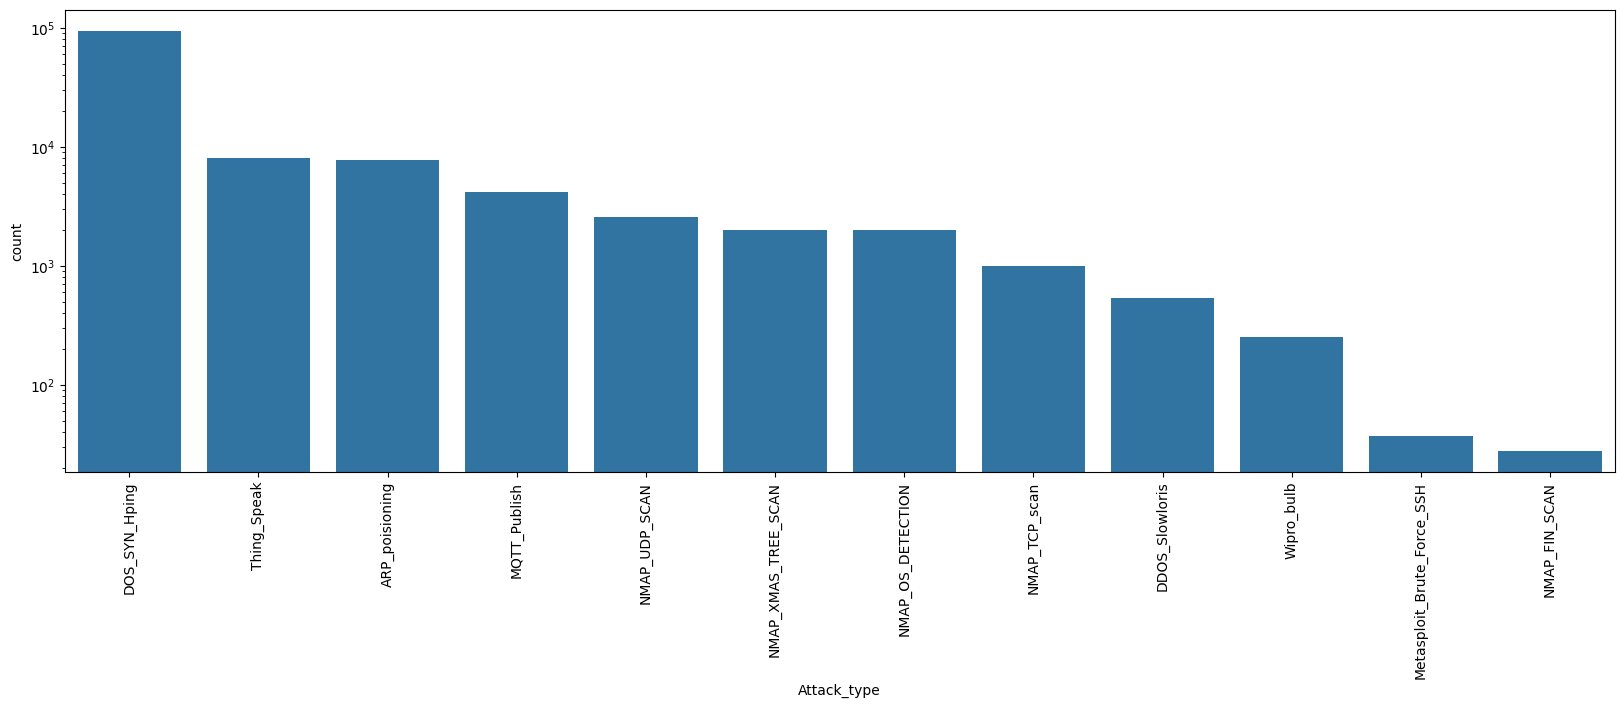

In [14]:
figure = plt.subplots(figsize=(20,6))
sns.countplot(data=train,x=train['Attack_type'],order=train['Attack_type'].value_counts().index)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

#### 흐름 지속 시간(flow_duration)에 따른 공격 유형

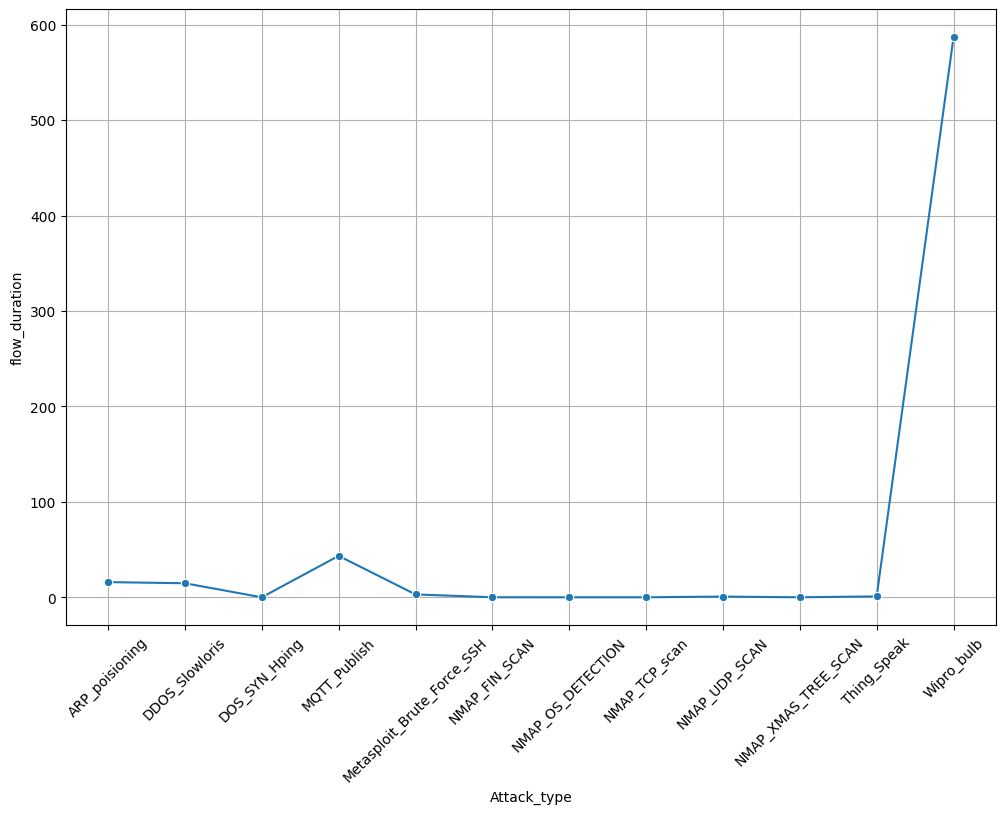

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính toán giá trị trung bình của flow_duration cho mỗi loại tấn công
avg_flow_duration_by_attack_type = train.groupby('Attack_type')['flow_duration'].mean().reset_index()

# Vẽ biểu đồ đường
plt.figure(figsize=(12, 8))
sns.lineplot(data=avg_flow_duration_by_attack_type, x='Attack_type', y='flow_duration', marker='o')

plt.xlabel('Attack_type')
plt.ylabel('flow_duration')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#### 패킷 간 시간 간격(iat)에 따른 공격 유형

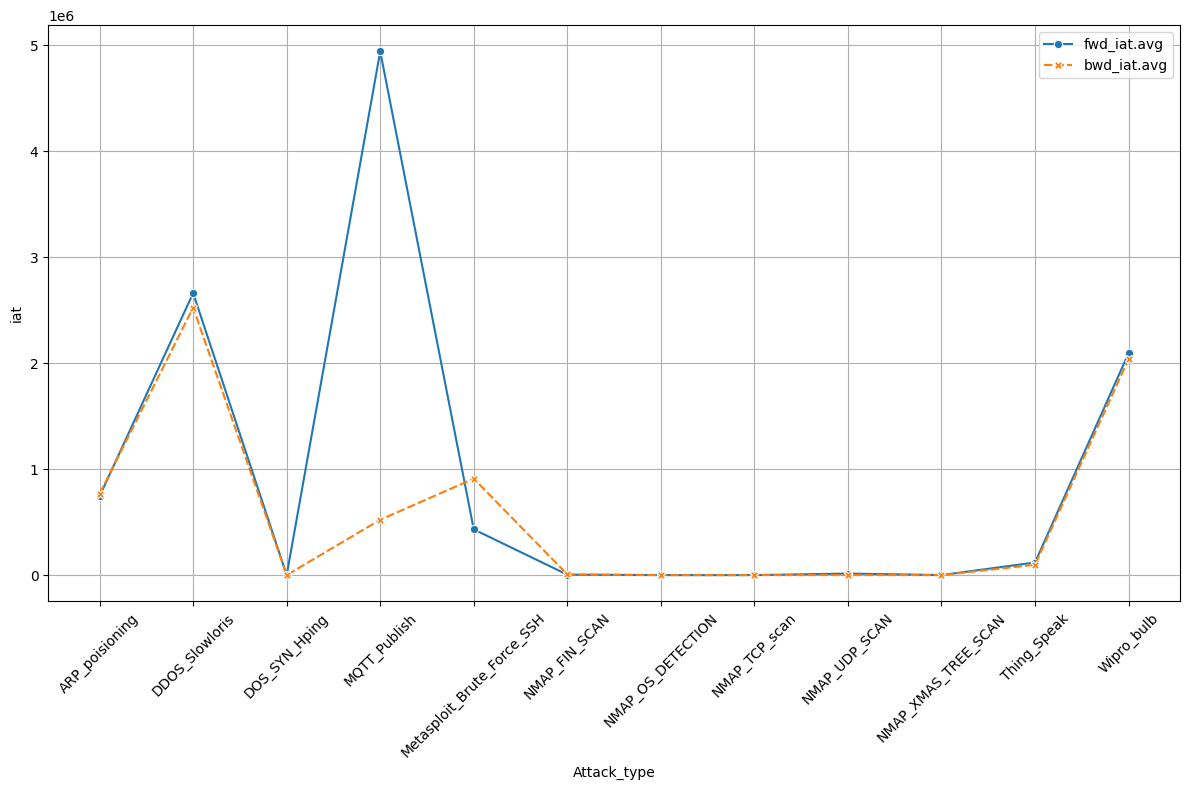

In [16]:

# Tính toán giá trị trung bình của fwd_iat.avg và bwd_iat.avg cho từng loại tấn công
attack_type_iat = train.groupby('Attack_type')[['fwd_iat.avg', 'bwd_iat.avg']].mean()

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))
sns.lineplot(data=attack_type_iat, markers=True)

plt.xlabel('Attack_type')
plt.ylabel('iat')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


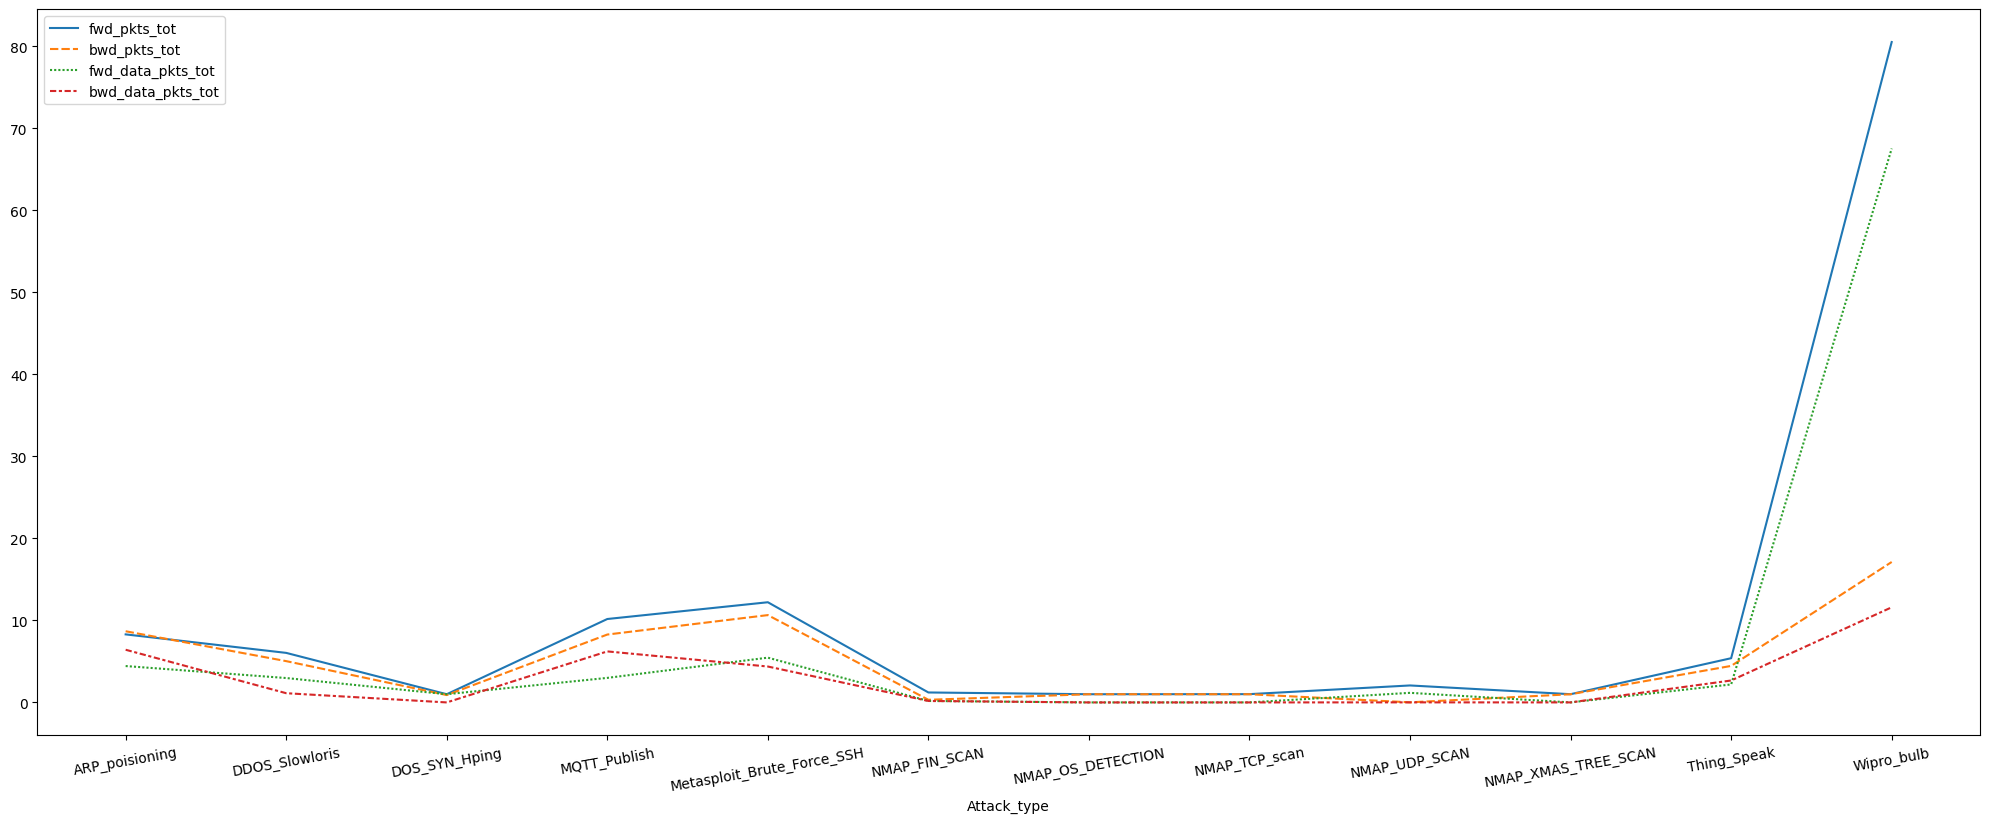

In [17]:
attack_type_fwd_bwd_points= train.groupby('Attack_type')[['fwd_pkts_tot','bwd_pkts_tot','fwd_data_pkts_tot','bwd_data_pkts_tot']].mean()
#attack_type_fwd_bwd_points.plot(figsize=(15,5))
figure = plt.subplots(figsize=(20,8))
sns.lineplot(attack_type_fwd_bwd_points)
plt.tight_layout()
plt.xticks(rotation=10)
plt.show()

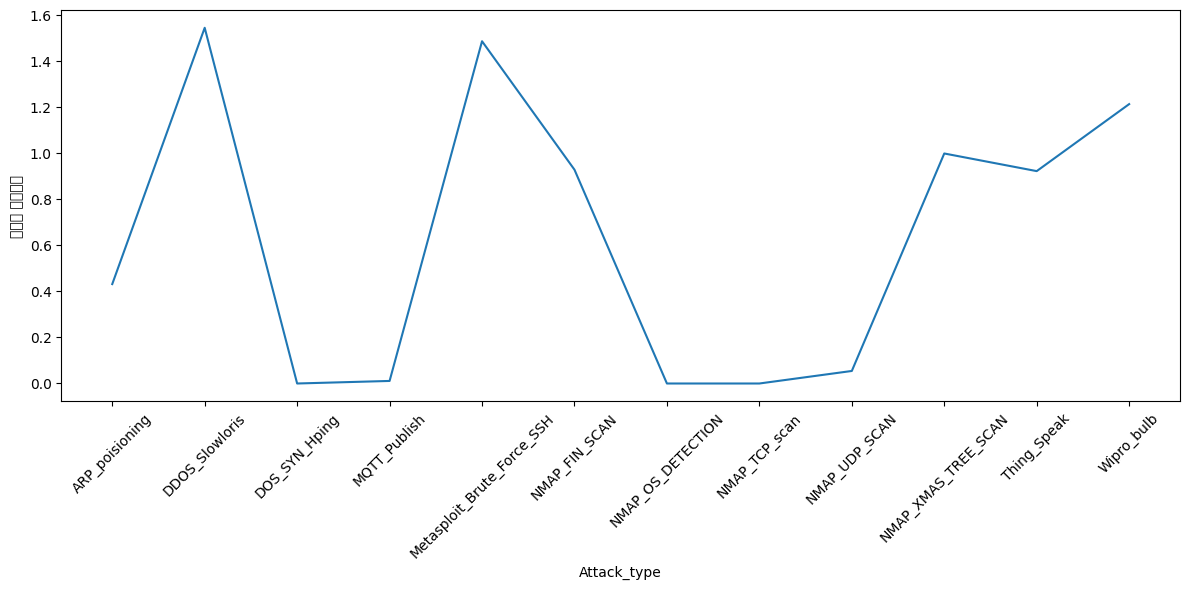

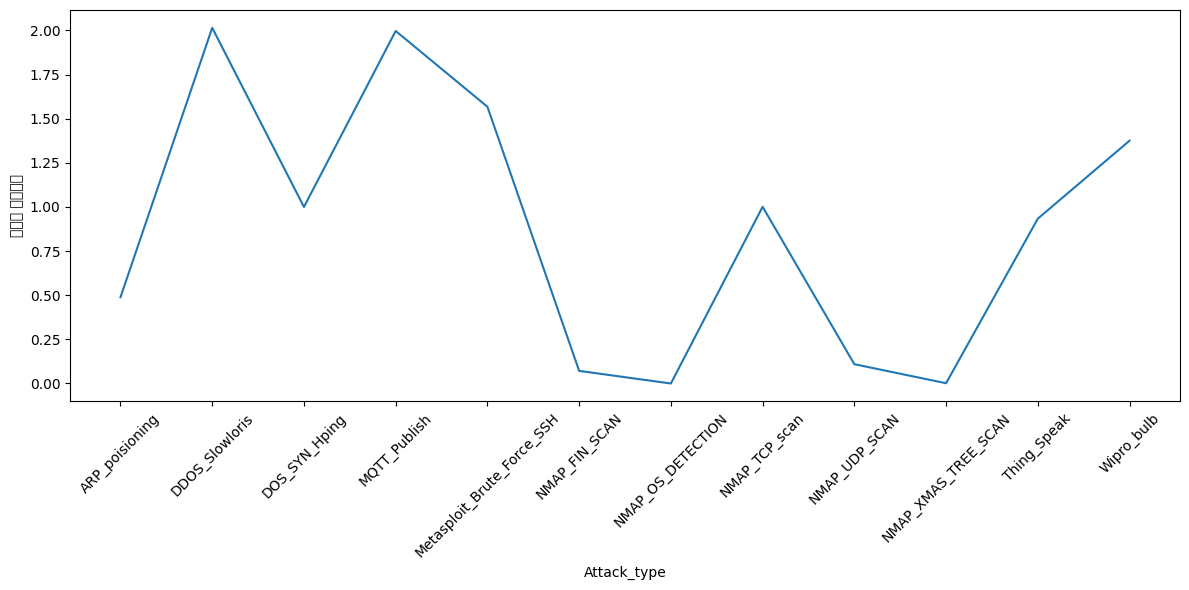

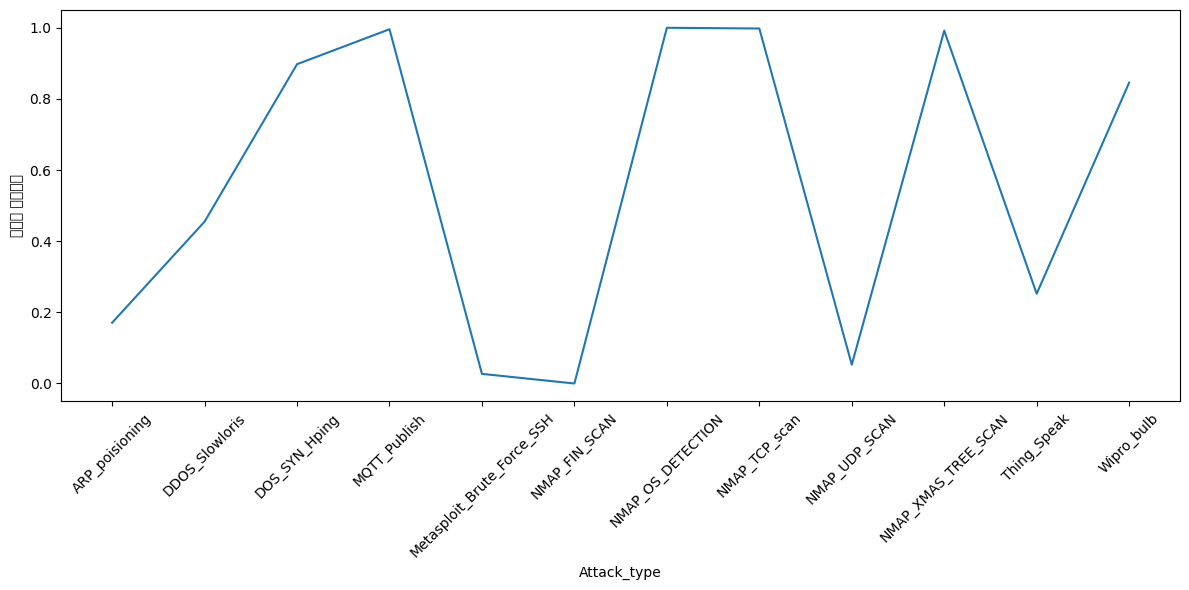

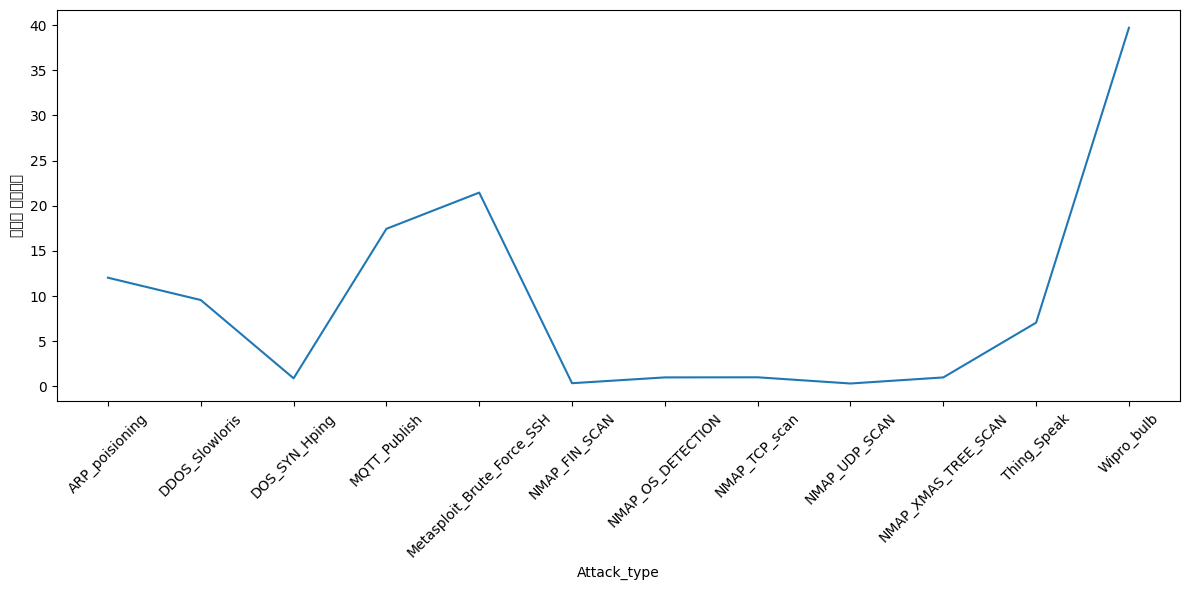

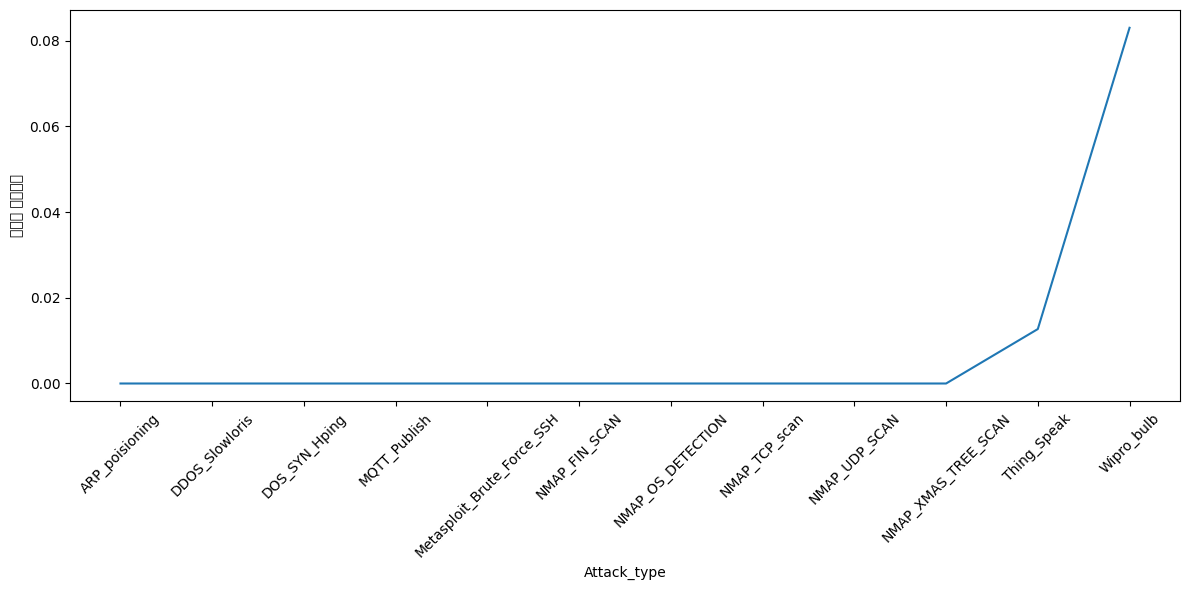

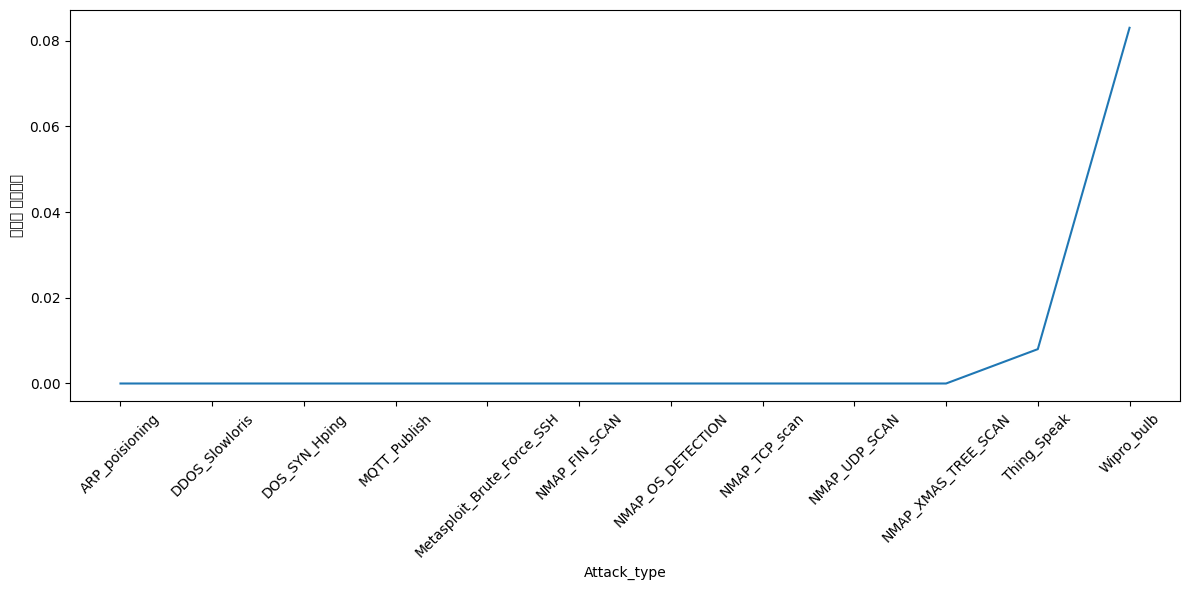

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

attack_type_flow_flag = train.groupby('Attack_type')[['flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count', 'flow_ACK_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count']].mean()

for column in attack_type_flow_flag.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=attack_type_flow_flag[column])
    plt.xlabel('Attack_type')
    plt.ylabel('양방향 패킷총합')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# 3.Training

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
X = train.drop(columns=['Attack_type'])
X.drop(columns=['Unnamed: 0', 'id.orig_p', 'id.resp_p'], inplace=True)
X['proto'] = label_encoder.fit_transform(X['proto'])
X['service'] = label_encoder.fit_transform(X['service'])
y = label_encoder.fit_transform(train[target])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    classification_rep = classification_report(y_test, y_pred)
    print("Classification Report for", name)
    print(classification_rep)
    print("--------------------------------------------------")

Classification Report for KNN
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1578
           1       0.92      0.86      0.89       100
           2       1.00      1.00      1.00     18897
           3       0.98      1.00      0.99       871
           4       0.57      0.67      0.62         6
           5       1.00      0.67      0.80         3
           6       0.97      0.98      0.98       393
           7       0.99      1.00      0.99       220
           8       0.96      0.97      0.97       489
           9       0.98      0.97      0.98       384
          10       0.95      0.95      0.95      1625
          11       0.83      0.43      0.57        58

    accuracy                           0.99     24624
   macro avg       0.93      0.87      0.89     24624
weighted avg       0.99      0.99      0.99     24624

--------------------------------------------------
Classification Report for Decision Tree
            